In [1]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09405801936973575
gamma = 1.004453024014182

I=0.6
L = 2.5 # m cooler length
r_beam=25*1e-3



T_perp = 0.1 # <E> [eV] = kb*T
T_l =  0.01 # <E> [eV]
B = 0.075 # T for LEIR
B_ratio=1e-10
Z=54

mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

length = 78.54370266 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T



beta_x=5
beta_y=5
emittance=14*1e-6

arc=dtk.LinearTransferMatrix(Q_x=5.38518956965, Q_y=5.36921653748,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )




num_particles=1

#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),

dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=20*1e-3,
        px=0,
        y=0*1e-3,
        py=0,
        delta=0,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=B_ratio,
                                         Neutralisation_space_charge=0,Neutralisation_rotation=1)

       

num_turns=int(1e5)


import matplotlib.pyplot as plt

# initialize arrays
x = []
px = []
y = []
py = []
action_x = []
action_y = []
force = []

goal_actions=1e-7

# loop over turns
for i in tqdm(range(num_turns)):
    # append coordinates to arrays
    x.append(dtk_particle.x)
    px.append(dtk_particle.px)
    y.append(dtk_particle.y)
    py.append(dtk_particle.py)
    
    # calculate action in horizontal plane
    action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
    action_x.append(action_x_temp)
    
    # calculate action in vertical plane
    action_y_temp = 0.5*(dtk_particle.y**2/beta_y + beta_y*dtk_particle.py**2)
    action_y.append(action_y_temp)
    
    # append force to array
    force.append(dtk_cooler.force(dtk_particle))
    
    # track particle through arc and cooler
    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
y = np.array(y)
py = np.array(py)
action_x = np.array(action_x)
action_y = np.array(action_y)
force = np.array(force)

# create time array
time = np.arange(num_turns) * ms_per_turn


#12208065043
#74489



100%|██████████| 100000/100000 [00:10<00:00, 9323.27it/s]


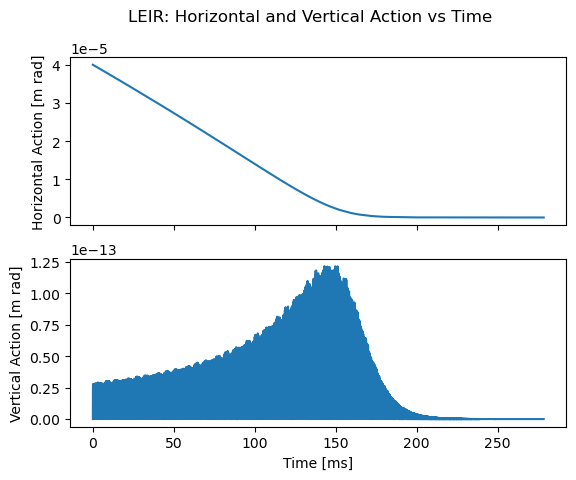

In [2]:
# plot horizontal and vertical action vs time
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('LEIR: Horizontal and Vertical Action vs Time')
ax1.plot(time, action_x)
#ax1.plot(time, action_y)
ax1.set_ylabel('Horizontal Action [m rad]')
ax2.plot(time, action_y)
ax2.set_ylabel('Vertical Action [m rad]')
ax2.set_xlabel('Time [ms]')

ax1.ticklabel_format(useOffset=False)
ax2.ticklabel_format(useOffset=False)

plt.show()


In [3]:
dtk_cooler.omega

8128974.479399313